# Standalization

For a prediction by machine learning, standalized values should be able to be reverted.

In [ ]:
IS_GOOGLE_COLAB = False

if IS_GOOGLE_COLAB:
  base_folder = "/Data/FX"
  data_folder = f'/content/drive/My Drive{base_folder}'
else:
  base_folder = 'L:/data/fx/HistData/csv'
  data_folder = base_folder

In [81]:
import os
import numpy as np
import pandas as pd

ohlc_column = ['open','high','low','close']
file_name = "mt5_USDJPY_min30.csv"

file_path = os.path.join(data_folder, 'fx', 'OANDA-Japan MT5 Live', file_name)
file_path = os.path.abspath(file_path)
df = pd.read_csv(file_path, parse_dates=True, index_col=0)
df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2014-07-07 08:30:00,102.086,102.122,102.081,102.102,738,3,0
2014-07-07 09:00:00,102.102,102.146,102.098,102.113,1036,3,0
2014-07-07 09:30:00,102.113,102.115,102.042,102.044,865,3,0
2014-07-07 10:00:00,102.047,102.052,102.005,102.019,983,3,0
2014-07-07 10:30:00,102.017,102.025,101.918,101.941,1328,3,0
...,...,...,...,...,...,...,...
2022-08-12 21:30:00,133.461,133.506,133.439,133.484,1125,3,0
2022-08-12 22:00:00,133.484,133.530,133.437,133.475,1277,3,0
2022-08-12 22:30:00,133.475,133.486,133.433,133.483,1506,3,0


## MiniMax

## EMA

In [81]:
# We can caliculate EMA by df.ewm(span=interval, adjust=False).mean(), but we can caliculate it by ourself so that we can revert it.
import numpy as np


interval = 10

lastMeanValue = df.iloc[0]
lastStdValue = df.iloc[0] - df.iloc[0]

ema = [lastMeanValue]
std = [lastStdValue]
alpha = 2 / (interval + 1)

for i in range(1, len(df)):
    meanValue = lastMeanValue.values * (1 - alpha) + df.iloc[i] * alpha
    meanValue.name = df.iloc[i].name
    ema.append(meanValue)
    if i < interval:
        std_temp = [(df.iloc[index] - meanValue)**2 for index in range(i)]
        denominator = i
    else:
        std_temp = [(df.iloc[index] - meanValue)**2 for index in range(i-interval, i)]
        denominator = interval
    stdValue = np.sqrt(sum(std_temp) / denominator)
    stdValue.name = df.iloc[i].name
    std.append(stdValue)
    lastMeanValue = meanValue

In [85]:
std_df_org = pd.DataFrame(std)
std_df_org

,open,high,low,close,tick_volume,spread,real_volume
2014-07-07 08:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
Unnamed 0,0.002909,0.004364,0.003091,0.002000,54.181818,4.440892e-16,0.0
Unnamed 1,0.008032,0.015432,0.015584,0.015423,169.870697,4.440892e-16,0.0
Unnamed 2,0.019024,0.021188,0.025572,0.031005,129.107362,4.440892e-16,0.0
Unnamed 3,0.028893,0.037169,0.040943,0.042009,116.786879,4.440892e-16,0.0
...,...,...,...,...,...,...,...
Unnamed 100714,0.096641,0.125355,0.043455,0.099432,6734.099848,4.438598e-01,0.0
Unnamed 100715,0.099767,0.126956,0.045854,0.103189,6716.973613,4.444617e-01,0.0
Unnamed 100716,0.103523,0.092189,0.048039,0.083485,3419.276803,3.146527e-01,0.0
Unnamed 100717,0.083575,0.075404,0.047206,0.053656,1799.954359,3.149335e-01,0.0


In [86]:
ema_df_org = pd.DataFrame(ema)

In [88]:
alpha = 3

standalized_df = df - ema_df_org
standalized_df = standalized_df / (alpha * std_df_org.values)
standalized_df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2014-07-07 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-07 09:00:00,1.500000,1.500000,1.500000,1.500000,1.500000,0.333333,NaN
2014-07-07 09:30:00,0.818059,-0.200831,-0.736604,-1.060983,0.116910,0.333333,NaN
2014-07-07 10:00:00,-0.663603,-0.930589,-0.761878,-0.651727,0.375118,0.333333,NaN
2014-07-07 10:30:00,-0.640667,-0.632138,-0.968854,-0.899932,1.144956,0.333333,NaN
...,...,...,...,...,...,...,...
2022-08-12 21:30:00,-0.276501,-0.227360,-0.186381,-0.156929,-0.129192,0.005720,-inf
2022-08-12 22:00:00,-0.156266,-0.132119,-0.156409,-0.147508,-0.099800,0.004673,-inf
2022-08-12 22:30:00,-0.146925,-0.279033,-0.144860,-0.123039,-0.142141,0.005401,-inf


In [89]:
standalized_df.describe()

f:\d_drive\workspace\stocknet_study\venv_38\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,open,high,low,close,tick_volume,spread,real_volume
count,100719.000000,100719.000000,100719.000000,100719.000000,100719.000000,98262.000000,9.597900e+04
mean,0.016511,0.010196,0.023938,0.016541,0.008257,-0.117512,-inf
std,0.380599,0.387734,0.384545,0.380704,0.347196,1.638258,NaN
min,-3.218376,-2.704827,-3.745723,-3.184221,-2.125165,-294.896560,-inf
25%,-0.227095,-0.243963,-0.218994,-0.227316,-0.208834,-0.333333,NaN
50%,0.024699,0.006659,0.044276,0.024732,-0.057721,-0.178237,NaN
75%,0.260305,0.253884,0.275383,0.260511,0.184176,0.092205,-3.333333e-01
max,2.806099,3.258523,3.317428,2.817657,1.749614,2.594326,1.884382e+00


<Axes: title={'center': 'Standalized Prices'}, xlabel='time'>

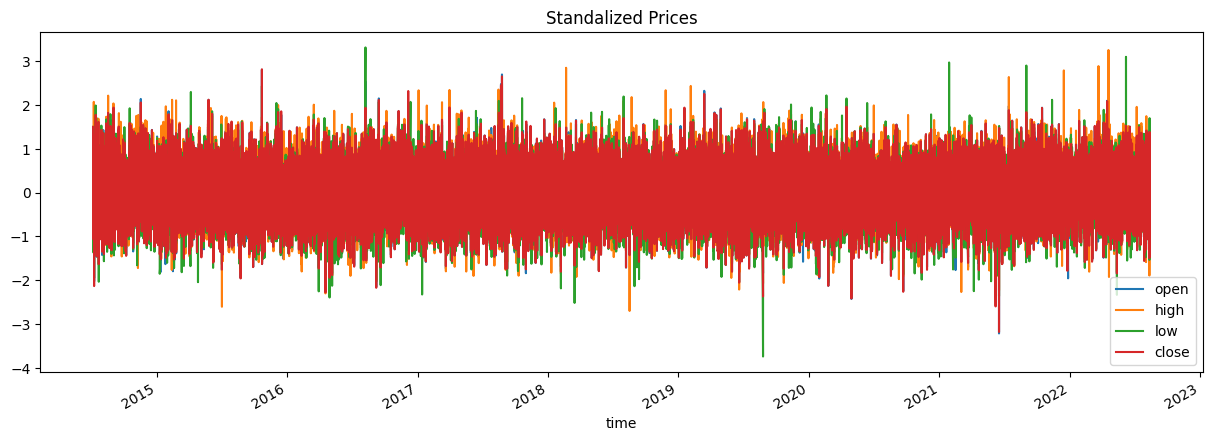

In [92]:
standalized_df[["open", "high", "low", "close"]].plot(figsize=(15, 5), title="Standalized Prices")

<Axes: >

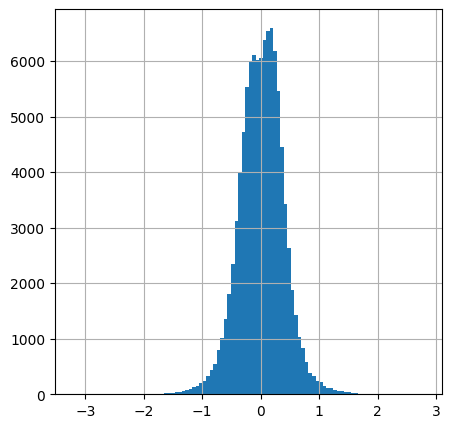

In [94]:
standalized_df["open"].hist(bins=100, figsize=(5, 5))

Revert the standalized value


It require value_i to revert prediction value_i to original value_i<br>
  prediction[i] = (value_i - mean_i) / std_i <br>
  value_i = prediction[index] * std_i + mean_i<br>
  mean_i = (1 - alpha) * mean_{i-1} + alpha * value_i<br>
So, we can't revert prediction value to original value_i. It only help to understand that prediction inmply value_i is high or low than mean_i

## Diff ID

In [6]:
import glob

In [82]:
close_df = df["close"].diff().dropna()
close_df.head()

time
2014-07-07 09:00:00    0.011
2014-07-07 09:30:00   -0.069
2014-07-07 10:00:00   -0.025
2014-07-07 10:30:00   -0.078
2014-07-07 11:00:00    0.008
Name: close, dtype: float64

In [83]:
def count_sig_digits_visual(x, tol=1e-12):
    """
    浮動小数点誤差を無視し、人間の目で見たときの有効数字の桁数を推定
    """
    if x == 0 or np.isnan(x):
        return 0

    # 誤差を無視するため丸める（例: tol=1e-12 → 12桁以内に収める）
    rounded = round(x / tol) * tol  # 例: tol=1e-12 の精度で揃える
    # 見た目ベースで桁数を数える（指数表現なし）
    s = format(rounded, '.15g')  # 最大15桁の精度で、人間が見る表現に近づける
    s = s.replace('.', '')
    return len(s)

def group_by_close_values(series, atol=1e-12, rtol=1e-9):
    values = np.sort(series[series > 0].values)
    if len(values) == 0:
        return pd.DataFrame(columns=["count", "sigfig_min", "sigfig_max", "sigfig_median"])

    groups = []
    current_group = [values[0]]

    for val in values[1:]:
        if np.isclose(val, current_group[-1], atol=atol, rtol=rtol):
            current_group.append(val)
        else:
            groups.append(current_group)
            current_group = [val]

    if current_group:
        groups.append(current_group)

    # 結果をまとめる
    rows = []
    for group in groups:
        key = np.median(group)
        rows.append({
            "value": key,
            "count": len(group),
        })

    return pd.DataFrame(rows).set_index("value").sort_index()

In [84]:
close_df

time
2014-07-07 09:00:00    0.011
2014-07-07 09:30:00   -0.069
2014-07-07 10:00:00   -0.025
2014-07-07 10:30:00   -0.078
2014-07-07 11:00:00    0.008
                       ...  
2022-08-12 21:30:00    0.023
2022-08-12 22:00:00   -0.009
2022-08-12 22:30:00    0.008
2022-08-12 23:00:00    0.038
2022-08-12 23:30:00   -0.208
Name: close, Length: 100719, dtype: float64

In [86]:
diff_group = group_by_close_values(close_df)
unit = diff_group[diff_group > diff_group.mean()].index.min()
sf = count_sig_digits_visual(unit)
unit = unit.round(sf)
unit

np.float64(0.001)

### STD BASE

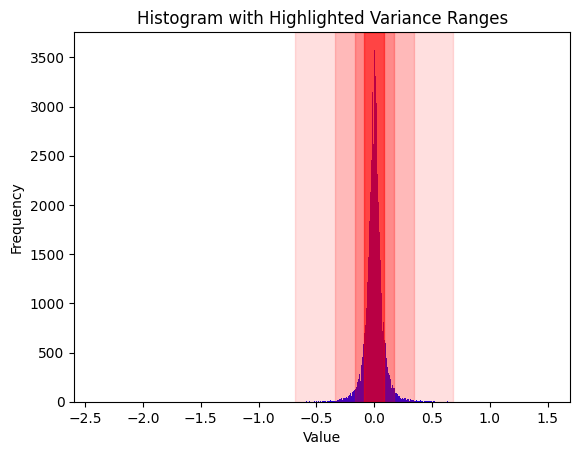

In [88]:
import matplotlib.pyplot as plt

ax = plt.subplot()

close_mean = close_df.mean()
close_std = close_df.std()

counts, edges, patches = plt.hist(close_df, bins=1000, color='blue')

# y軸の最大値を取得
ymax = counts.max()

# 範囲ごとに塗り潰し（a±b、a±2bに相当するstd使用）
for alpha in range(4):
    plt.axvspan(close_mean - close_std * (2** alpha), close_mean + close_std *(2**alpha), color='red', alpha=0.5 / (alpha+1), ymin=0, ymax=1)

plt.title("Histogram with Highlighted Variance Ranges")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [89]:
def std_based_class(value, mean, std, max_alpha=3, sf=3):
    rounded_value = np.round(value, sf)
    if rounded_value == 0:
        return 0
    MAX_FACTOR = 10
    unit = 1 / MAX_FACTOR
    for id_index, factor in enumerate(range(1, MAX_FACTOR+1)):
        alpha = unit * factor
        if mean - std * alpha <= rounded_value and mean + std * alpha >= rounded_value:
            id = id_index + 1
            if mean > rounded_value:
                return - id
            else:
                return id
    
    ID_BASE = MAX_FACTOR + 1

    MAX_FACTOR = 5
    unit = 1 / MAX_FACTOR
    for id_index, factor in enumerate(range(1, MAX_FACTOR+1)):
        alpha = 1 + unit * factor
        if mean - std * alpha <= rounded_value and mean + std * alpha >= rounded_value:
            id = ID_BASE + id_index
            if mean > rounded_value:
                return - id
            else:
                return id

    ID_BASE += MAX_FACTOR

    MAX_FACTOR = 2
    unit = 1 / MAX_FACTOR
    for id_index, factor in enumerate(range(1, MAX_FACTOR+1)):
        alpha = 2 + unit * factor
        if mean - std * alpha <= rounded_value and mean + std * alpha >= rounded_value:
            id = ID_BASE + id_index
            if mean > rounded_value:
                return - id
            else:
                return id
    
    ID_BASE += MAX_FACTOR
    for id_index, alpha in enumerate(range(2, max_alpha+1)):
        if mean - std * 2 ** alpha <= rounded_value and mean + std * 2 ** alpha >= rounded_value:
            id = ID_BASE + id_index
            if mean > rounded_value:
                return - id
            else:
                return id
                
    ID_BASE += max_alpha - 1 
    if mean > rounded_value:
        return - ID_BASE
    else:
        return ID_BASE

In [90]:
std_id_df = close_df.apply(lambda x: std_based_class(x, close_mean, close_std))

In [91]:
std_id_df.head()

time
2014-07-07 09:00:00     2
2014-07-07 09:30:00    -9
2014-07-07 10:00:00    -3
2014-07-07 10:30:00   -10
2014-07-07 11:00:00     1
Name: close, dtype: int64

<Axes: >

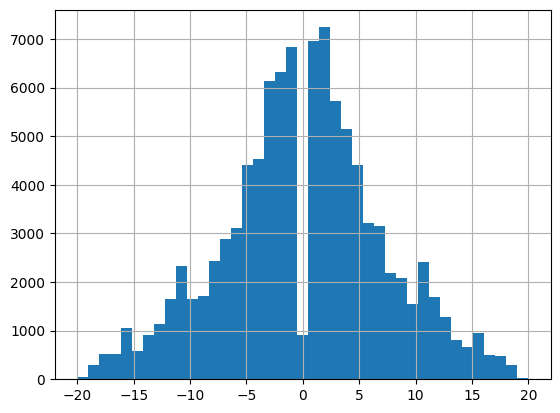

In [92]:
std_id_df.hist(bins=41)

In [93]:
(std_id_df + abs(std_id_df.min())).max()

np.int64(40)

(-0.0851409980291379, 0.08576076192671432)

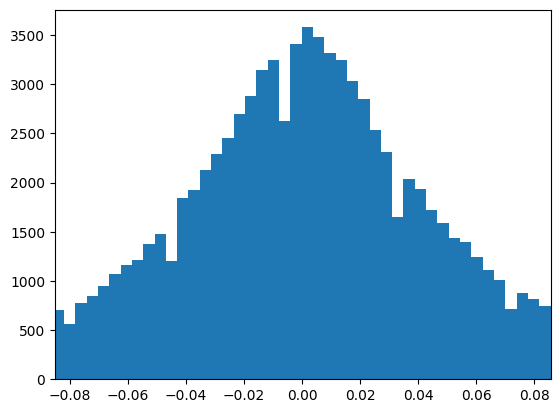

In [94]:
plt.hist(close_df, bins=1000)
plt.xlim(close_mean - close_std, close_mean + close_std)

<Axes: xlabel='close'>

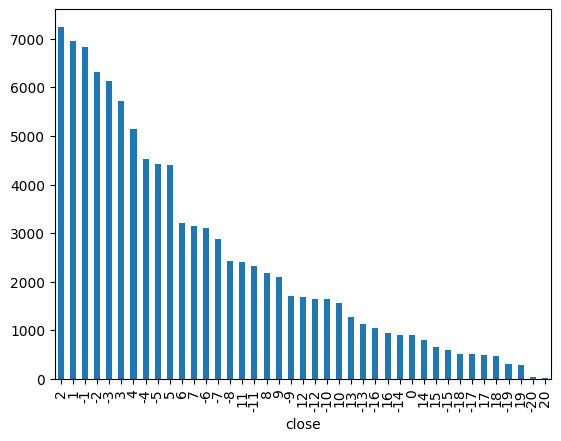

In [95]:
std_id_df.value_counts().plot.bar()

In [290]:
test_df = pd.concat([close_df, std_id_df], axis=1, keys=["close", "id"])
test_df.head()

,close,id
time,,
2014-07-07 09:00:00,0.011,2
2014-07-07 09:30:00,-0.069,-9
2014-07-07 10:00:00,-0.025,-3
2014-07-07 10:30:00,-0.078,-10
2014-07-07 11:00:00,0.008,1


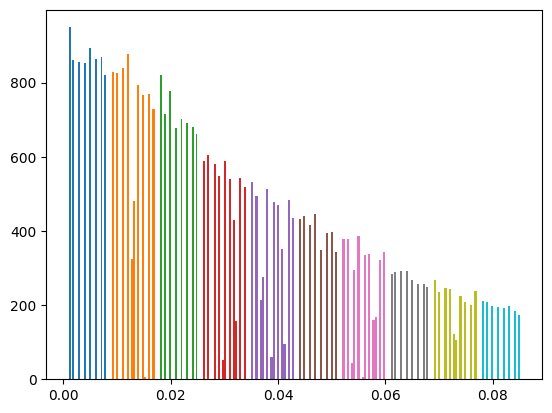

In [294]:
for id in range(1, 11):
    id_values = test_df[test_df["id"] == id]
    plt.hist(id_values["close"], bins=20)

### Parcentile Base

In [168]:
pct = 1
range_min = 0
thresholds = [0]
close_abs_df = close_df.abs()

while pct < 100:
    range_max = np.percentile(close_abs_df, pct)
    range_max = np.round(range_max, sf)
    if range_min == range_max:
        pct += 1
        continue
    thresholds.append(range_max)
    range_min = range_max
    pct += 1

In [169]:
pct_unit = 1/ (100 - len(thresholds))
pct = 99 + pct_unit
while pct <= 100:
    range_max = np.percentile(close_abs_df, pct)
    range_max = np.round(range_max, sf)
    if range_min == range_max:
        pct += pct_unit
        continue
    thresholds.append(range_max)
    range_min = range_max
    pct += pct_unit

In [170]:
thresholds

[0,
 np.float64(1e-05),
 np.float64(2e-05),
 np.float64(3e-05),
 np.float64(4e-05),
 np.float64(5e-05),
 np.float64(6e-05),
 np.float64(7e-05),
 np.float64(8e-05),
 np.float64(9e-05),
 np.float64(0.0001),
 np.float64(0.00011),
 np.float64(0.00012),
 np.float64(0.00013),
 np.float64(0.00014),
 np.float64(0.00015),
 np.float64(0.00016),
 np.float64(0.00017),
 np.float64(0.00018),
 np.float64(0.00019),
 np.float64(0.0002),
 np.float64(0.00021),
 np.float64(0.00022),
 np.float64(0.00023),
 np.float64(0.00024),
 np.float64(0.00025),
 np.float64(0.00026),
 np.float64(0.00027),
 np.float64(0.00028),
 np.float64(0.00029),
 np.float64(0.0003),
 np.float64(0.00031),
 np.float64(0.00032),
 np.float64(0.00033),
 np.float64(0.00035),
 np.float64(0.00036),
 np.float64(0.00037),
 np.float64(0.00038),
 np.float64(0.00039),
 np.float64(0.0004),
 np.float64(0.00041),
 np.float64(0.00042),
 np.float64(0.00043),
 np.float64(0.00045),
 np.float64(0.00046),
 np.float64(0.00048),
 np.float64(0.00049),
 np.fl

(-0.0077, 0.0077)

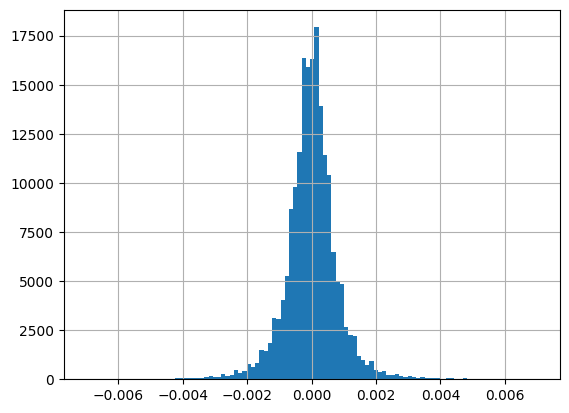

In [173]:
ax = close_df.hist(bins=1000)
ax.set_xlim(-0.0077, 0.0077)